# ORBIT HOMEWORK

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [3]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian
N = UNITS.newton

<Unit('newton')>

In [8]:
r_e = 147e9 * m
r_j = 778e9 * m
init_jupiter_mass = 1.898e27 * kg

init = State(x_e = r_e, y_e = 0 * m, vx_e = 0 *m/s, vy_e = -29784 *m/s,
             x_s = 0 * m, y_s = 0 * m, vx_s = 0 *m/s, vy_s = 0 *m/s,
             x_j = r_j, y_j = 0 * m, vx_j = 0 *m/s, vy_j = -13069 *m/s, m_j = init_jupiter_mass)

,values
x_e,147000000000.0 meter
y_e,0 meter
vx_e,0.0 meter / second
vy_e,-29784.0 meter / second
x_s,0 meter
y_s,0 meter
vx_s,0.0 meter / second
vy_s,0.0 meter / second
x_j,778000000000.0 meter
y_j,0 meter


In [13]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                angle = 45 * degree,
                t_0=0 * s,
                t_end=31536000 * s)

,values
init,x -147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
angle,45 degree
t_0,0 second
t_end,31536000 second


In [14]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x,y,vx,vy = state
    unpack(system)
    
    cur_position = Vector(x,y)
    mag = cur_position.mag
    
    force = G * m1 * m2 / mag**2
    direction = -cur_position.hat()
    
    u_force = direction * force
    
    return u_force

In [15]:
force = universal_gravitation(init,system)

<Quantity([ 3.6686486e+22 -0.0000000e+00], 'newton')>

In [16]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x,y,vx,vy = state
    unpack(system)    

    force = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = force.x / m2
    dvydt = force.y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [17]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(29784.0, 'meter / second')>,
 <Quantity(0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [34]:
def event_func(state, t, system):
    x,y,vx,vy = state
    if t>1:
        return r_0 + x
    else:
        return 1

In [38]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events=event_func, max_step = 10000)
details

,values
sol,None
t_events,[[]]
nfev,18998
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [39]:
results

,x,y,vx,vy
0.000000e+00,-1.470000e+11,0.000000e+00,0.000000e+00,29784.000000
4.748232e-08,-1.470000e+11,1.414214e-03,2.916878e-10,29784.000000
5.223056e-07,-1.470000e+11,1.555635e-02,3.208566e-09,29784.000000
5.270538e-06,-1.470000e+11,1.569777e-01,3.237735e-08,29784.000000
5.275286e-05,-1.470000e+11,1.571191e+00,3.240652e-07,29784.000000
5.275761e-04,-1.470000e+11,1.571333e+01,3.240943e-06,29784.000000
5.275809e-03,-1.470000e+11,1.571347e+02,3.240972e-05,29784.000000
5.275813e-02,-1.470000e+11,1.571348e+03,3.240975e-04,29784.000000
5.275814e-01,-1.470000e+11,1.571348e+04,3.240976e-03,29784.000000
5.275814e+00,-1.470000e+11,1.571348e+05,3.240976e-02,29784.000000


Saving figure to file figs/chap10-fig02.pdf


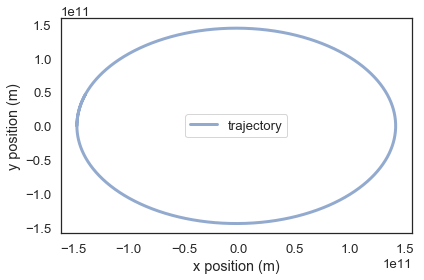

In [40]:
def plot_trajectory(results):
    plot(results.x, results.y, label='trajectory')

    decorate(xlabel='x position (m)',
             ylabel='y position (m)')

plot_trajectory(results)
savefig('figs/chap10-fig02.pdf')